In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/description.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt


In [2]:
import pandas as pd
df=pd.read_csv("/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/description.txt")
df

,Train data:
0,ID ::: TITLE ::: GENRE ::: DESCRIPTION
1,ID ::: TITLE ::: GENRE ::: DESCRIPTION
2,ID ::: TITLE ::: GENRE ::: DESCRIPTION
3,ID ::: TITLE ::: GENRE ::: DESCRIPTION
4,Test data:
5,ID ::: TITLE ::: DESCRIPTION
6,ID ::: TITLE ::: DESCRIPTION
7,ID ::: TITLE ::: DESCRIPTION
8,ID ::: TITLE ::: DESCRIPTION
9,Source:


In [3]:
import nltk
import string
import re

import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.preprocessing import LabelEncoder  
from sklearn.linear_model import LogisticRegression

In [5]:
df_train = pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt', sep=":::", header=None, engine='python')
df_test = pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt', sep=":::", header=None, engine='python')

In [6]:
df_train

,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [7]:
df_test

,0,1,2
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       54200 non-null  int64 
 1   1       54200 non-null  object
 2   2       54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       54214 non-null  int64 
 1   1       54214 non-null  object
 2   2       54214 non-null  object
 3   3       54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [10]:
df_train.columns = ['Sno', 'movie_name', 'category', 'reveiw']
df_test.columns = ['Sno', 'movie_name', 'reveiw']

In [11]:
df_test.isnull().sum()

Sno           0
movie_name    0
reveiw        0
dtype: int64

In [12]:
df_train.isnull().sum()

Sno           0
movie_name    0
category      0
reveiw        0
dtype: int64

In [13]:
df_test.shape

(54200, 3)

In [14]:
df_train.shape

(54214, 4)

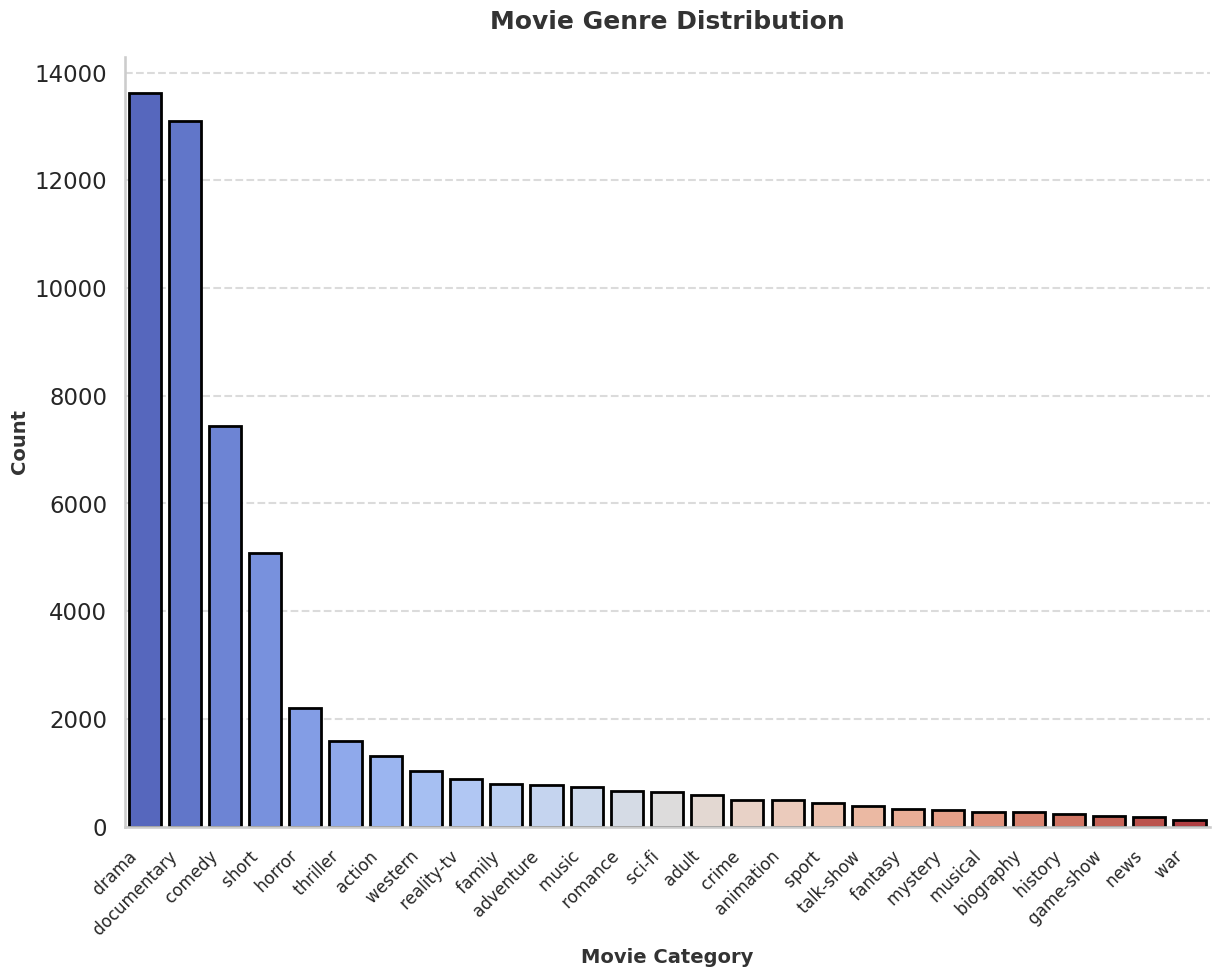

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern style for the plot
sns.set(style="whitegrid", context="talk", palette="muted")

# Set figure size
plt.figure(figsize=(14, 10))

# Customize the count plot
sns.countplot(x='category', data=df_train, 
              order=df_train['category'].value_counts().index,  # Sorting by count
              palette="coolwarm",  # A stylish color palette
              edgecolor='black',  # Add borders to bars
              linewidth=2)  # Border width

# Customize labels and title with stylish fonts and sizes
plt.xlabel('Movie Category', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='#333333')
plt.title('Movie Genre Distribution', fontsize=18, fontweight='bold', color='#333333', pad=20)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines to enhance readability
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)

# Remove top and right borders for a clean look
sns.despine()

# Display the plot
plt.show()

In [16]:
train_data = pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt', sep=':::', names=['Movie_title', 'Genre', 'Description'], engine='python')

test_path = "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Movie_title', 'Description'], engine='python')


In [17]:
stemmer = LancasterStemmer()
stop_words=stopwords.words("english")

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles and email addresses
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Remove special characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text) #tokenize text
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove multiple spaces
    return text

# Apply the clean_text function to the 'Description' column in the training and test data
train_data['New_text'] = train_data['Description'].apply(clean_text)
test_data['New_text'] = test_data['Description'].apply(clean_text)

In [18]:
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train_data['New_text'])
X_test = tfidf.transform(test_data['New_text'])

In [19]:
# training and validation sets
X = X_train
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

Naive Bayes:

MultinomialNB() is commonly used for text data and is trained using fit(X_train, y_train). Predictions are made using predict(X_val), and the accuracy is calculated.

In [20]:
# 1. Naive Bayes
nb_model = MultinomialNB()  # You can use MultinomialNB for text data or GaussianNB for continuous data
nb_model.fit(X_train, y_train)  # Train the Naive Bayes model
nb_preds = nb_model.predict(X_val)  # Predict on validation set
nb_accuracy = accuracy_score(y_val, nb_preds)  # Calculate accuracy
print(f'Naive Bayes Accuracy: {nb_accuracy:.4f}')

Naive Bayes Accuracy: 0.4470


Logistic Regression:

LogisticRegression() is initialized with max_iter=1000 to ensure the model has enough iterations to converge. It's trained with fit(X_train, y_train) and evaluated similarly with predict(X_val).

In [21]:
# # 2. Logistic Regression
# lr_model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues occur
# lr_model.fit(X_train, y_train)  # Train Logistic Regression model
# lr_preds = lr_model.predict(X_val)  # Predict on validation set
# lr_accuracy = accuracy_score(y_val, lr_preds)  # Calculate accuracy
# print(f'Logistic Regression Accuracy: {lr_accuracy:.4f}')

Logistic Regression might take a long time to train for text prediction due to several reasons:

1. **High Dimensionality**: 
   - Text data, when vectorized (using methods like TF-IDF or Count Vectorization), often results in a very large number of features (dimensions). Logistic Regression performs slower when dealing with high-dimensional data.

2. **Model Convergence**:
   - Logistic Regression uses an iterative optimization algorithm like **Gradient Descent**. If the dataset is large or complex, it may require many iterations to converge, increasing the time taken.

3. **Feature Sparsity**:
   - Text data often results in sparse matrices (many zero values). Although Logistic Regression can handle sparse data, this can slow down the optimization process.

4. **Max Iterations**:
   - By default, Logistic Regression may not converge within the default number of iterations. Increasing `max_iter` helps, but also increases training time.

5. **Regularization**:
   - Logistic Regression includes a regularization term (like L2). Tuning this term can affect training speed, especially if the value needs to be optimized.

To improve speed, you can:
- **Reduce the number of features** (dimensionality reduction).
- **Tune the regularization** parameters.
- **Increase the learning rate** or optimize hyperparameters.

lr_model = LogisticRegression(solver='saga', max_iter=1000)

Reduce feature dimensionality by limiting vocabulary size


Support Vector Machine (SVM):

SVC() is the default support vector classifier in scikit-learn. The model is trained and evaluated in the same way as the others.

In [22]:
# # 3. Support Vector Machine (SVM)
# svm_model = SVC()  # SVC() is the default support vector classifier
# svm_model.fit(X_train, y_train)  # Train SVM model
# svm_preds = svm_model.predict(X_val)  # Predict on validation set
# svm_accuracy = accuracy_score(y_val, svm_preds)  # Calculate accuracy
# print(f'Support Vector Machine (SVM) Accuracy: {svm_accuracy:.4f}')

It has the same problem as Logistic Regression its time taking for excution in training the text data


In [25]:
# Use the trained model to make predictions on the test data
X_test_predictions = nb_model.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions

In [26]:
# Save the test_data DataFrame with predicted genres to a CSV file
test_data.to_csv('predicted_genres.csv', index=False)

# Display the 'test_data' DataFrame with predicted genres
print(test_data)


          Id                       Movie_title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description  \
0       L.R. Brane loves his life - his car, his apar...   
1       Spain, March 1964: Quico is a very naughty ch...   
2       One year in the life of Albin and his family ...   
3       His father has died, he hasn't spoken with hi...   
4       Before he was known internationally as a mart...   
...                                    

In [27]:
import pandas as pd

# Define the dataset using a dictionary
data = {
    'Id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Movie_title': [
        "Edgar's Lunch (1998)", 
        "La guerra de papá (1977)", 
        "Off the Beaten Track (2010)", 
        "Meu Amigo Hindu (2015)", 
        "Er nu zhai (1955)", 
        "Tales of Light & Dark (2013)", 
        "Der letzte Mohikaner (1965)", 
        "Oliver Twink (2007)", 
        "Slipstream (1973)", 
        "Curitiba Zero Grau (2010)"
    ],
    'Description': [
        "L.R. Brane loves his life - his car, his apartment, his job especially his prized possessions. But soon, he's going to lose them all.",
        "Spain, March 1964: Quico is a very naughty child, with three siblings belonging to a well-to-do family, and his world revolves around.",
        "One year in the life of Albin and his family, shepherds in the North Transylvanian Mountains.",
        "His father has died, he hasn't spoken with his brother for years, and he's facing a serious illness.",
        "Before he was known internationally as a martial arts superstar, Bruce Lee appeared as a young boy in Hong Kong films.",
        "Covering multiple genres, Tales of Light & Dark is an anthology series combining drama, horror, and suspense.",
        "As Alice and Cora Munro attempt to find their father, a British officer during the French and Indian War, they encounter several dangers.",
        "A movie 169 years in the making. Oliver Twist meets Artful Dodger in a comedic and modern adaptation of the classic tale.",
        "Popular but mysterious rock D.J. Mike Mallard is living a quiet life, but he's soon pulled into a world of danger and deceit.",
        "Curitiba is a city in movement, with rhythms and pulses as different cultures merge and blend."
    ]
}

# Create a DataFrame
dft = pd.DataFrame(data)

# Display the DataFrame
print(dft)


   Id                   Movie_title  \
0   1          Edgar's Lunch (1998)   
1   2      La guerra de papá (1977)   
2   3   Off the Beaten Track (2010)   
3   4        Meu Amigo Hindu (2015)   
4   5             Er nu zhai (1955)   
5   6  Tales of Light & Dark (2013)   
6   7   Der letzte Mohikaner (1965)   
7   8           Oliver Twink (2007)   
8   9             Slipstream (1973)   
9  10     Curitiba Zero Grau (2010)   

                                         Description  
0  L.R. Brane loves his life - his car, his apart...  
1  Spain, March 1964: Quico is a very naughty chi...  
2  One year in the life of Albin and his family, ...  
3  His father has died, he hasn't spoken with his...  
4  Before he was known internationally as a marti...  
5  Covering multiple genres, Tales of Light & Dar...  
6  As Alice and Cora Munro attempt to find their ...  
7  A movie 169 years in the making. Oliver Twist ...  
8  Popular but mysterious rock D.J. Mike Mallard ...  
9  Curitiba is a cit